In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
from google.colab import files
files.upload_file('du_lieu_da_xu_ly(1).csv')

Saved du_lieu_da_xu_ly (1).csv to /content/du_lieu_da_xu_ly(1).csv


In [ ]:
df=pd.read_csv('du_lieu_da_xu_ly(1).csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in ['chipset', 'GPU', 'sim_slot', 'operating_system']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [ ]:
df = df.drop(columns=['title'])


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


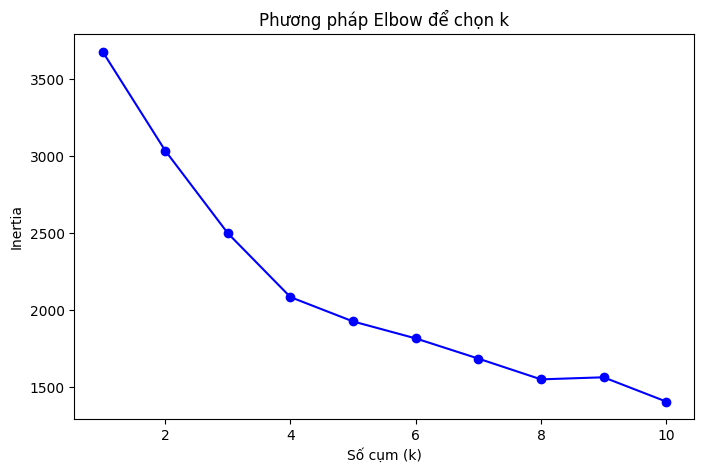

                price   ratings  num_rates  screen_size  refresh_rate  \
Cluster                                                                 
0        5.684583e+06  4.911310  17.345238     6.649940    104.964286   
1        2.123786e+07  4.861905  50.976190     6.340476     84.285714   
2        7.553333e+05  4.866667   8.400000     2.172667    120.000000   
3        2.536069e+07  4.931034  14.396552     6.749138    120.827586   

           chipset        GPU   sim_slot  operating_system  storage_GB  \
Cluster                                                                  
0        73.541667  36.142857  10.630952          0.017857  168.571429   
1        76.571429  50.904762  10.761905          3.000000  211.809524   
2        74.000000  52.133333   9.666667          0.400000   65.141667   
3        81.534483  44.293103   7.396552          0.413793  456.827586   

         battery_mAh  RAM_in_GB  
Cluster                          
0        5028.750000   7.523810  
1        4196.

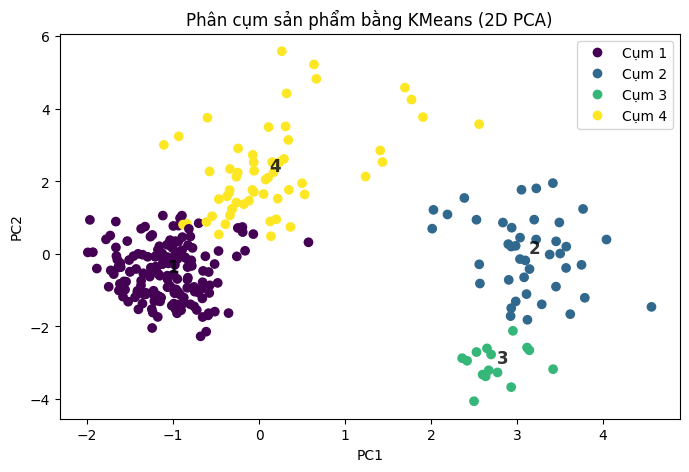

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Đọc dữ liệu (giả định)
# df = pd.read_csv('your_data.csv')  # Thay bằng đường dẫn file của bạn

# Bỏ cột 'title' vì không cần thiết
# df = df.drop('title', axis=1)

# Xử lý cột categorical
categorical_cols = ['chipset', 'GPU', 'sim_slot', 'operating_system']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Xử lý giá trị thiếu (nếu có)
df = df.fillna(df.mean())

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Phương pháp Elbow để chọn k
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Vẽ Elbow plot
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Phương pháp Elbow để chọn k')
plt.show()

# Chọn k
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Thêm nhãn cụm vào dữ liệu gốc
df['Cluster'] = clusters

# Phân tích các cụm
print(df.groupby('Cluster').mean())

# Trực quan hóa (giảm chiều bằng PCA)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 5))
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')

# Tính trung tâm của từng cụm và gán nhãn 1, 2, 3, 4,...
unique_clusters = np.unique(clusters)
for i, cluster_id in enumerate(unique_clusters, start=1):
    indices = np.where(clusters == cluster_id)[0]
    cluster_center = np.mean(pca_data[indices], axis=0)
    plt.annotate(str(i), (cluster_center[0], cluster_center[1]), fontsize=12, color='black', weight='bold', alpha=0.8)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Phân cụm sản phẩm bằng KMeans (2D PCA)')
plt.legend(handles=scatter.legend_elements()[0], labels=['Cụm 1', 'Cụm 2', 'Cụm 3', 'Cụm 4'])
plt.show()